<h4> AutoInland Vehicle Insurance Claim Challenge

<h5> Objective:

- To predict if a client will submit a vehicle insurance claim in the next 3 months.

___

In [2]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline


# Supress warnings
import warnings
warnings.filterwarnings('ignore')


#esthetics
pd.options.display.max_columns =200
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
#plt.rcParams['figure.figsize'] = (16, 8)
%config InlineBackend.figure_format = 'svg'

In [3]:
import os
os.chdir('D:\Francis\YDG\Hackathons\Zindi\AutoLand')

In [4]:
# load dataset
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [5]:
display('Test Data:',test.head())
display('Train Data:',train.head())

'Test Data:'

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic


'Train Data:'

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1


In [6]:
# create a set column that will be used for merging the datasets
train['set'] = 'train'
test['set'] = 'test'

train.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'set'],
      dtype='object')

In [7]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,set
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0,train
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1,train
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0,train
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0,train
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1,train


In [8]:
test.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,set
0,ID_01QM0NU,2010-10-23,2011-10-22,Female,46,2010-10-23,1,NaN,NaN,Ford,Abuja Municipal,Abuja-Municipal,Car Classic,test
1,ID_024NJLZ,2010-10-14,2011-10-13,Male,32,2010-10-14,1,NaN,NaN,NaN,Kosofe,Benue,Car Classic,test
2,ID_02NOVWQ,2010-08-29,2011-08-28,Female,45,2010-08-29,2,Saloon,Black,Honda,Wuse 11,Abuja,Car Classic,test
3,ID_02VSP68,2010-06-13,2011-06-12,Female,58,2010-06-13,1,Saloon,NaN,TOYOTA,NaN,NaN,CarSafe,test
4,ID_02YB37K,2010-07-01,2011-06-30,NaN,120,2010-07-01,1,Saloon,Red,Hyundai,Victoria Island,Lagos,Car Classic,test


In [9]:
display('Train Shape:', train.shape)
display('Test Shape:', test.shape)

'Train Shape:'

(12079, 15)

'Test Shape:'

(1202, 14)

In [10]:
display('Missing Values in Train set:', train.isnull().sum())
display('Missing Values in Test set:', test.isnull().sum())

'Missing Values in Train set:'

ID                           0
Policy Start Date            0
Policy End Date              0
Gender                     359
Age                          0
First Transaction Date       0
No_Pol                       0
Car_Category              3738
Subject_Car_Colour        6962
Subject_Car_Make          2476
LGA_Name                  6476
State                     6488
ProductName                  0
target                       0
set                          0
dtype: int64

'Missing Values in Test set:'

ID                          0
Policy Start Date           0
Policy End Date             0
Gender                     41
Age                         0
First Transaction Date      0
No_Pol                      0
Car_Category              372
Subject_Car_Colour        697
Subject_Car_Make          248
LGA_Name                  656
State                     656
ProductName                 0
set                         0
dtype: int64

In [11]:
# merge the datasets
df = pd.concat([train, test])
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,set
0,ID_0040R73,2010-05-14,2011-05-13,Male,30,2010-05-14,1,Saloon,Black,TOYOTA,NaN,NaN,Car Classic,0.00,train
1,ID_0046BNK,2010-11-29,2011-11-28,Female,79,2010-11-29,1,JEEP,Grey,TOYOTA,NaN,NaN,Car Classic,1.00,train
2,ID_005QMC3,2010-03-21,2011-03-20,Male,43,2010-03-21,1,Saloon,Red,TOYOTA,NaN,NaN,Car Classic,0.00,train
3,ID_0079OHW,2010-08-21,2011-08-20,Male,2,2010-08-21,1,NaN,NaN,NaN,NaN,NaN,CarSafe,0.00,train
4,ID_00BRP63,2010-08-29,2010-12-31,Entity,20,2010-08-29,3,NaN,NaN,NaN,Lagos,Lagos,Muuve,1.00,train


In [12]:
df['set'].value_counts()

train    12079
test      1202
Name: set, dtype: int64

In [13]:
df.shape

(13281, 15)

In [14]:
df.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target', 'set'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 1201
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      13281 non-null  object 
 1   Policy Start Date       13281 non-null  object 
 2   Policy End Date         13281 non-null  object 
 3   Gender                  12881 non-null  object 
 4   Age                     13281 non-null  int64  
 5   First Transaction Date  13281 non-null  object 
 6   No_Pol                  13281 non-null  int64  
 7   Car_Category            9171 non-null   object 
 8   Subject_Car_Colour      5622 non-null   object 
 9   Subject_Car_Make        10557 non-null  object 
 10  LGA_Name                6149 non-null   object 
 11  State                   6137 non-null   object 
 12  ProductName             13281 non-null  object 
 13  target                  12079 non-null  float64
 14  set                     13281 non-null 

In [16]:
nulls_df = pd.DataFrame(df.isnull().sum().reset_index().values, columns=['Features', '# Missing Values'])
nulls_df

,Features,# Missing Values
0,ID,0
1,Policy Start Date,0
2,Policy End Date,0
3,Gender,400
4,Age,0
5,First Transaction Date,0
6,No_Pol,0
7,Car_Category,4110
8,Subject_Car_Colour,7659
9,Subject_Car_Make,2724


In [17]:
nulls_df['% Missing Values'] = nulls_df['# Missing Values'] / len(df) * 100
ranked = nulls_df.sort_values('% Missing Values', ascending=False)
ranked

,Features,# Missing Values,% Missing Values
8,Subject_Car_Colour,7659,57.67
11,State,7144,53.79
10,LGA_Name,7132,53.70
7,Car_Category,4110,30.95
9,Subject_Car_Make,2724,20.51
13,target,1202,9.05
3,Gender,400,3.01
0,ID,0,0.00
1,Policy Start Date,0,0.00
2,Policy End Date,0,0.00


In [18]:
# duplicated rows
df.duplicated().sum()

0

In [19]:
# Check the shape of the train and test sets
print(f'The shape of the train set is: {train.shape}\nThe shape of the test set is: {test.shape}')

The shape of the train set is: (12079, 15)
The shape of the test set is: (1202, 14)


In [20]:
# Check the shape of the full dataset
print(f'The shape of the merged dataset is: {df.shape}')

The shape of the merged dataset is: (13281, 15)


<h4> Exploratory Data Analysis

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 1201
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      13281 non-null  object 
 1   Policy Start Date       13281 non-null  object 
 2   Policy End Date         13281 non-null  object 
 3   Gender                  12881 non-null  object 
 4   Age                     13281 non-null  int64  
 5   First Transaction Date  13281 non-null  object 
 6   No_Pol                  13281 non-null  int64  
 7   Car_Category            9171 non-null   object 
 8   Subject_Car_Colour      5622 non-null   object 
 9   Subject_Car_Make        10557 non-null  object 
 10  LGA_Name                6149 non-null   object 
 11  State                   6137 non-null   object 
 12  ProductName             13281 non-null  object 
 13  target                  12079 non-null  float64
 14  set                     13281 non-null 

In [22]:
# change column data types
date_cols = ['Policy Start Date','Policy End Date','First Transaction Date' ]
for col in df.columns:
    if col in date_cols:
        df[col] = pd.to_datetime(df[col])
        
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 1201
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      13281 non-null  object        
 1   Policy Start Date       13281 non-null  datetime64[ns]
 2   Policy End Date         13281 non-null  datetime64[ns]
 3   Gender                  12881 non-null  object        
 4   Age                     13281 non-null  int64         
 5   First Transaction Date  13281 non-null  datetime64[ns]
 6   No_Pol                  13281 non-null  int64         
 7   Car_Category            9171 non-null   object        
 8   Subject_Car_Colour      5622 non-null   object        
 9   Subject_Car_Make        10557 non-null  object        
 10  LGA_Name                6149 non-null   object        
 11  State                   6137 non-null   object        
 12  ProductName             13281 non-null  object 

In [23]:
df['No_Pol'] = df['No_Pol'].astype(str)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13281 entries, 0 to 1201
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      13281 non-null  object        
 1   Policy Start Date       13281 non-null  datetime64[ns]
 2   Policy End Date         13281 non-null  datetime64[ns]
 3   Gender                  12881 non-null  object        
 4   Age                     13281 non-null  int64         
 5   First Transaction Date  13281 non-null  datetime64[ns]
 6   No_Pol                  13281 non-null  object        
 7   Car_Category            9171 non-null   object        
 8   Subject_Car_Colour      5622 non-null   object        
 9   Subject_Car_Make        10557 non-null  object        
 10  LGA_Name                6149 non-null   object        
 11  State                   6137 non-null   object        
 12  ProductName             13281 non-null  object 

#### 1. Target Variable

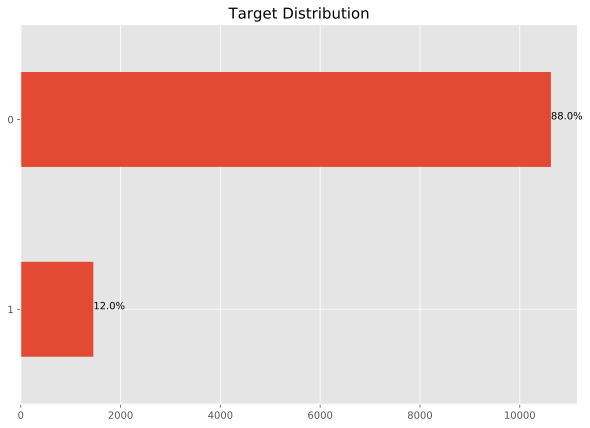

In [25]:
ax = train.target.value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('Target Distribution', fontdict={'size': 15})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/train.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

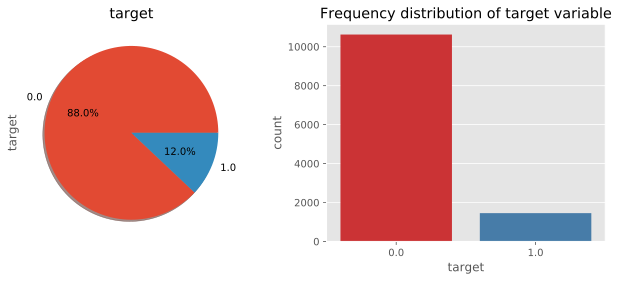

In [30]:
# visualize frequency distribution of targetvariable

f,ax=plt.subplots(1,2,figsize=(11,4))

ax[0] = df['target'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="target", data=df, palette="Set1")
ax[1].set_title("Frequency distribution of target variable")

plt.show()

#### 2. Gender

In [ ]:
# Gender distribution
ax = df.Gender.value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('Gender Distribution', fontdict={'size': 15})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

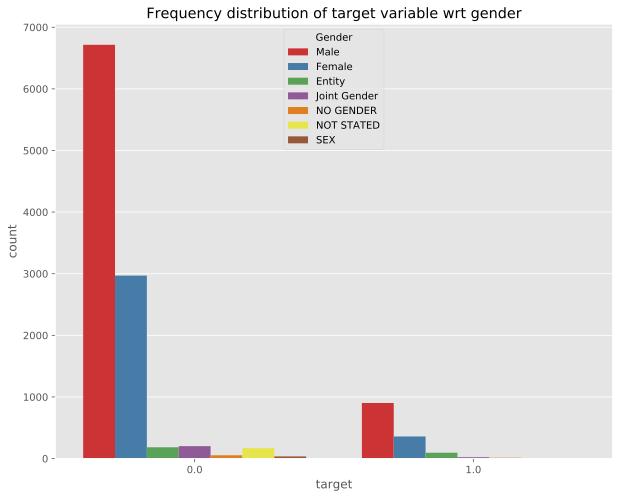

In [31]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="target", hue="Gender", data=df, palette="Set1")
ax.set_title("Frequency distribution of target variable wrt gender")
plt.show()

#### 3. Car Category

In [ ]:
# Car category distribution 
ax = df.Car_Category.value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('Car Category Distribution', fontdict={'size': 15})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

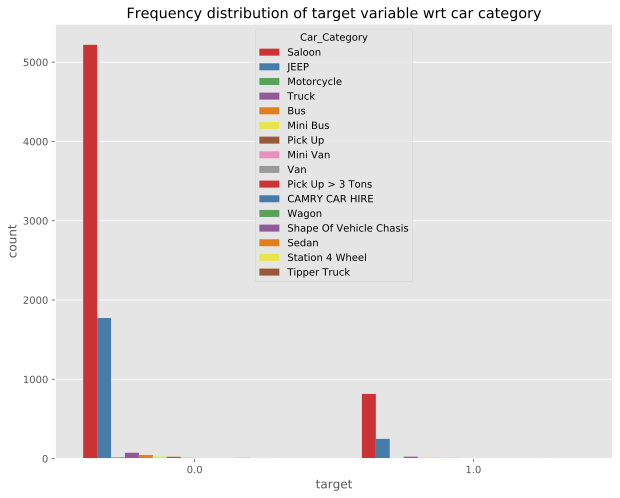

In [32]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="target", hue="Car_Category", data=df, palette="Set1")
ax.set_title("Frequency distribution of target variable wrt car category")
plt.show()

#### 4. Car Colour

In [ ]:
df['Subject_Car_Colour'].value_counts()

In [ ]:
# Car colour distribution 
ax = df.Subject_Car_Colour.value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('Car Colour Distribution', fontdict={'size': 15})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

#### 5. Car Make

In [ ]:
df['Subject_Car_Make'].value_counts()

In [ ]:
# Car make distribution 
ax = df.Subject_Car_Make.value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('Car Make Distribution', fontdict={'size': 10})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

#### 6. LGA_Name

In [ ]:
df['LGA_Name'].value_counts()

In [ ]:
df['LGA_Name'].describe()

#### 7. State

In [ ]:
df['State'].value_counts()

In [ ]:
df['State'].describe()

#### 8. ProductName

In [ ]:
df['ProductName'].value_counts()

In [ ]:
# ProductName distribution 
ax = df.ProductName.value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('ProductName Distribution', fontdict={'size': 10})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

#### 9. Age

In [ ]:
sns.distplot(df['Age'],bins=200,kde=True)

In [ ]:
df['Age'].describe()

In [ ]:
sns.boxplot(df['Age'], orient='v', width=0.4)

In [ ]:
sns.scatterplot(df['Age'], df['No_Pol'])

#### 10. No_Pol

In [ ]:
df['No_Pol'].value_counts()

In [ ]:
df['No_Pol'].describe()

In [ ]:
# Policy distribution 
ax = df.No_Pol.value_counts().sort_values().plot(kind = 'barh', figsize=(10,7))
plt.title('No of Policies Distribution', fontdict={'size': 10})
for p in ax.patches:
  percentage ='{:,.1f}%'.format((p.get_width()/df.shape[0])*100)
  width, height =p.get_width(),p.get_height()
  x=p.get_x()+width+0.02
  y=p.get_y()+height/2
  ax.annotate(percentage,(x,y))

In [ ]:
df['Policy Start Date'].describe()

In [ ]:
df['Policy End Date'].describe()

In [ ]:
df['First Transaction Date'].describe()

In [ ]:
#### Descriptive Statistics
df.describe()

In [ ]:
df['set'].value_counts()

#### Removing Outliers in Age

In [ ]:
# Using trimming to remove outliers in Age column
index = df[(df['Age'] >= 100)|(df['Age'] <= 18)].index
df.drop(index)
df['Age'].describe()

In [ ]:
df.describe()

In [ ]:
df['set'].value_counts()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
sns.boxplot(df['Age'], orient='v', width=0.4)

In [ ]:
sns.distplot(df['Age'],bins=200,kde=True)

In [ ]:
missing_df = pd.DataFrame(df.isnull().sum().reset_index().values, columns=['Features', '# Missing Values'])
missing_df['% Missing Values'] = missing_df['# Missing Values'] / len(df) * 100
missing_ranked = missing_df.sort_values('% Missing Values', ascending=False)
missing_ranked

In [ ]:
df['set'].value_counts()

#### Handling Missing Values

In [ ]:
missing_cols = ['Subject_Car_Colour', 'State', 'LGA_Name', 'Car_Category','Subject_Car_Make', 'Gender']

for col in missing_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    
# Confirm removal of missing values except for target variable
missing_df = pd.DataFrame(df.isnull().sum().reset_index().values, columns=['Features', '# Missing Values'])
missing_df['% Missing Values'] = missing_df['# Missing Values'] / len(df) * 100
missing_ranked = missing_df.sort_values('% Missing Values', ascending=False)
missing_ranked

In [ ]:
df.head()

In [ ]:
# save the clean dataset
df.to_csv('clean_df.csv', index=False)

In [ ]:
df.info()

In [ ]:
df['set'].value_counts()